In [11]:
__author__ = "@Tssp"
__date__   = "16/02/21"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5)) / 2
aursize = (4.3*aur, 4.3)

In [3]:
delta = np.loadtxt('Simulations/delta_asc_ix6603.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc_ix6603.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [4]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [5]:
print(os.getcwd())
folder_path = "Simulations/ix6604_iy4993_iz50/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q1d


In [6]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_120rm8g2l60m8_68CM8g1L60M8_Li7a200_Li7a200_kx1000_ky1000_kz1000_ix6604_iy4993_iz50_LiLi_a3Sup_0{d}_sinTnx6_sinTny6_sinTnz6/Ag_vsLiLi_int_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.69000', '.69100', '.69200', '.69300', '.69400', '.69500', '.69600', '.69700', '.69800', '.69900', '.70000', '.70100', '.70200', '.707666', '.707891', '.7081066', '.7083468', '.708483', '.708822', '.7090032', '.7090948', '.7092404', '.7091583', '.71295', '.71300', '.71305', '.71310', '.71315', '.71320', '.71325', '.71330', '.71335', '.71340', '.71345', '.71350', '.71355', '.71360', '.71365', '.71370', '.71375', '.71380', '.71385', '.71390', '.71395', '.71400', '.71405', '.71410', '.71415', '.71420', '.71425', '.71430', '.71435', '.71440', '.71445', '.71450', '.71455', '.71460', '.71465', '.71470', '.71475', '.71480', '.71485', '.71490', '.71495', '.71500', '.71505', '.71510', '.71515', '.71520', '.71525', '.71530', '.71535', '.71540', '.71545', '.71550', '.71555', '.71560', '.71565', '.71570', '.71575', '.71580', '.71585', '.71590', '.71595', '.71600', '.71605', '.71610', '.71615', '.71620', '.71625', '.71630', '.71635', '.71640', '.71645'

In [7]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [8]:
dic = transpose_energies(Data)

In [9]:
least_bound_pos = 1052

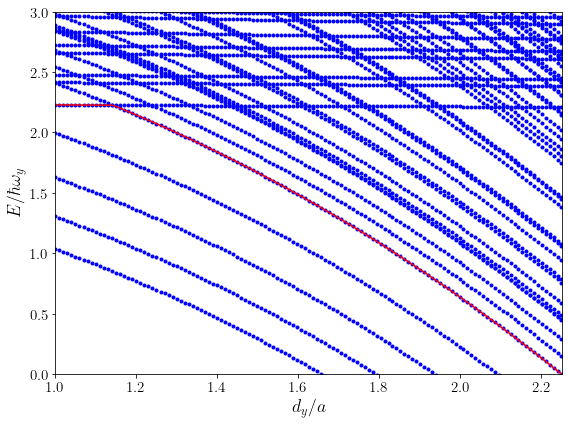

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 100):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'b.')
ax.plot(x, dic['nivel_1056']/wy, 'r')
#ax.plot(x, dic['nivel_1000']/wy, 'r')
ax.set_ylim(0, 3)
ax.set_xlim(1, 2.25)
ax.set_xlabel('$d_{y}/a$')
ax.set_ylabel('$E/\hbar \omega_{y}$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix4993_Iy4993_Iz50_400_Easc.png', dpi=200)
plt.show()

# $$(4,0,0) (0,4,0) (2,2,0)$$

In [11]:
%matplotlib inline

## Resonance x>1

1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082


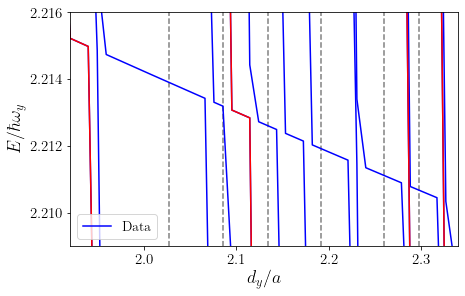

In [12]:
fig2, ax2 = plt.subplots(figsize=aursize)
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+17, least_bound_pos + 31):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1069']/wy, 'r')
ax2.plot(x, dic['nivel_1073']/wy, 'r')
ax2.plot(x, dic['nivel_1079']/wy, 'r')
ax2.plot(x, dic['nivel_1081']/wy, 'r')
ax2.vlines(x[42], 2.059, 2.216, alpha=0.5, linestyles='--')
ax2.vlines(x[36], 2.059, 2.216, alpha=0.5, linestyles='--')
ax2.vlines(x[31], 2.059, 2.216, alpha=0.5, linestyles='--')
ax2.vlines(x[25], 2.059, 2.216, alpha=0.5, linestyles='--')
ax2.vlines(x[18], 2.059, 2.216, alpha=0.5, linestyles='--')
ax2.vlines(x[14], 2.059, 2.216, alpha=0.5, linestyles='--')
ax2.set_ylim(2.209, 2.216)
ax2.set_xlim(1.92, 2.34)
ax2.set_xlabel('$d_{y}/a$')
ax2.set_ylabel('$E/\hbar \omega_{y}$')
ax2.legend(['Data'], fontsize=14)
#plt.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [13]:
print('''f Eigenstates:
1069: trap
1070: (0,2,10)
1071: (2,0,8)
1072: (2,0,10)
1073: (0,4,0) ICIR
1074: (0,2,12)
1075: (0,4,2)
1076: (0,0,20)
1077: (0,4,4)
1078: (2,0,12)
1079: (2,2,0) ICIR
1080: (0,2,14)
1081: (4,0,0) ICIR
''')

f Eigenstates:
1069: trap
1070: (0,2,10)
1071: (2,0,8)
1072: (2,0,10)
1073: (0,4,0) ICIR
1074: (0,2,12)
1075: (0,4,2)
1076: (0,0,20)
1077: (0,4,4)
1078: (2,0,12)
1079: (2,2,0) ICIR
1080: (0,2,14)
1081: (4,0,0) ICIR



In [14]:
print(f'''To find the eigenstates:
x={x[42]}, delta=0{delta[42]}
x={x[36]}, delta=0{delta[36]}
x={x[31]}, delta=0{delta[31]}
x={x[25]}, delta=0{delta[25]}
x={x[18]}, delta=0{delta[18]}
x={x[14]}, delta=0{delta[14]}
''')

To find the eigenstates:
x=2.0271091077285637, delta=0.70510
x=2.0852993031919804, delta=0.70480
x=2.1336990933795406, delta=0.70455
x=2.1916688735697245, delta=0.70425
x=2.2591492801245514, delta=0.70390
x=2.2976368106943728, delta=0.70370



In [15]:
%matplotlib inline

6.281228056693836e-15


(1.92, 2.33)

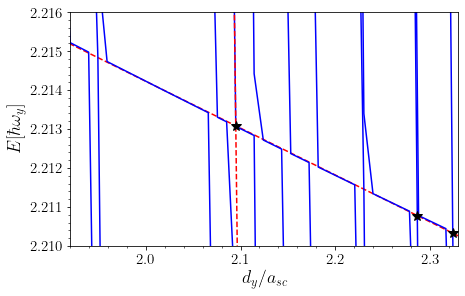

In [16]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1069:
trap_poly = trap_fit(dic, x, x_lims=(1.92, 2.34), y_lims=(2.209, 2.216) ,levels=(1069, 1080), wy=wy)/wy
ax3.plot(x, np.polyval(trap_poly, x), 'r--', markersize=4, label='Diabatic')
ax3.plot(x, dic['nivel_1069']/wy, 'b', label='Adiabatic')

# nivel 1070:
ax3.plot(x, dic['nivel_1070']/wy, 'b')

# nivel 1071:
ax3.plot(x, dic['nivel_1071']/wy, 'b')

# nivel 1072:
ax3.plot(x, dic['nivel_1072']/wy, 'b')

# nivel 1073:
ax3.plot(x, dic['nivel_1073']/wy, 'b')
f1073 = np.polyfit(x[(x < 2.1) & (x > 2.08)], np.array(dic['nivel_1073'])[(x < 2.1) & (x > 2.08)]/wy, deg=1)
x1073 = np.linspace(1.95, 2.3, num=200)
ax3.plot(x1073, np.polyval(f1073, x1073), 'r--', markersize=4)

# nivel 1074:
ax3.plot(x, dic['nivel_1074']/wy, 'b')

# nivel 1075:
ax3.plot(x, dic['nivel_1075']/wy, 'b')

# nivel 1076:
ax3.plot(x, dic['nivel_1076']/wy, 'b')

# nivel 1077:
ax3.plot(x, dic['nivel_1077']/wy, 'b')

# nivel 1078:
ax3.plot(x, dic['nivel_1078']/wy, 'b')

# nivel 1079:
ax3.plot(x, dic['nivel_1079']/wy, 'b')
f1079 = np.polyfit(x[(x < 2.30) & (x > 2.28)], np.array(dic['nivel_1079'])[(x < 2.30) & (x > 2.28)]/wy, deg=1)
x1079 = np.linspace(1.95, 2.2, num=200)

# nivel 1080:
ax3.plot(x, dic['nivel_1080']/wy, 'b')

# nivel 1081:
ax3.plot(x, dic['nivel_1081']/wy, 'b')
f1080 = np.polyfit(x[(x < 2.36) & (x > 2.32)], np.array(dic['nivel_1081'])[(x < 2.36) & (x > 2.32)]/wy, deg=1)
x1080 = np.linspace(1.95, 2.2, num=200)

# Crosses:
##########
ax3.plot(cross_points(trap_poly, f1073), np.polyval(trap_poly, cross_points(trap_poly, f1073)), 'k*', markersize=10, label='ICIR')
ax3.plot(cross_points(trap_poly, f1079), np.polyval(trap_poly, cross_points(trap_poly, f1079)), 'k*', markersize=10)
ax3.plot(cross_points(trap_poly, f1080), np.polyval(trap_poly, cross_points(trap_poly, f1080)), 'k*', markersize=10)


# States:
#########
#ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(2.05, 2.1126), xytext=(2.02, 2.1135), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,18)}\right>$', xy=(1.99, 2.061), xytext=(2, 2.061), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(2.19, 2.1135), xytext=(2.117, 2.1135), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(2.115, 2.111), xytext=(2.05, 2.111), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.75, 3.38), xytext=(1.75, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,2)}\right>$', xy=(1.843, 3.38), xytext=(1.80, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.843, 3.38), xytext=(1.85, 3.39), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))
#
#ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(1.86, 3.349), xytext=(1.85, 3.33), fontsize=14, 
#             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
#             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))


ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(2.21, 2.216)
ax3.set_xlim(1.92, 2.33)
#fig3.savefig('Results/Figures/Ix6604_Iy4993_Iz50_Easc_Interpolation_400_v2.png', bbox_inches="tight", dpi=200)

In [17]:
print(f'''Crosses between (x, E):
* 1069-1073: ({cross_points(trap_poly, f1073)}, {np.polyval(trap_poly, cross_points(trap_poly, f1073))})
* 1069-1079: ({cross_points(trap_poly, f1079)}, {np.polyval(trap_poly, cross_points(trap_poly, f1079))})
* 1069-1080: ({cross_points(trap_poly, f1080)}, {np.polyval(trap_poly, cross_points(trap_poly, f1080))})
''')

Crosses between (x, E):
* 1069-1073: (2.09497865906374, 2.2130836084588714)
* 1069-1079: (2.2868624490140865, 2.2107773041165903)
* 1069-1080: (2.3243722706786407, 2.210326463195606)



In [18]:
print(f'''ICIR: asc/dy:
* 1069-1073 (0,4,0): {1/cross_points(trap_poly, f1073)} 
* 1069-1079 (2,2,0): {1/cross_points(trap_poly, f1079)}
* 1069-1080 (4,0,0): {1/cross_points(trap_poly, f1080)}
''')

ICIR: asc/dy:
* 1069-1073 (0,4,0): 0.47733183136429025 
* 1069-1079 (2,2,0): 0.4372803447059619
* 1069-1080 (4,0,0): 0.43022368344982564



# $$(2,0,0) (0,2,0)$$

7.564816060007209e-15


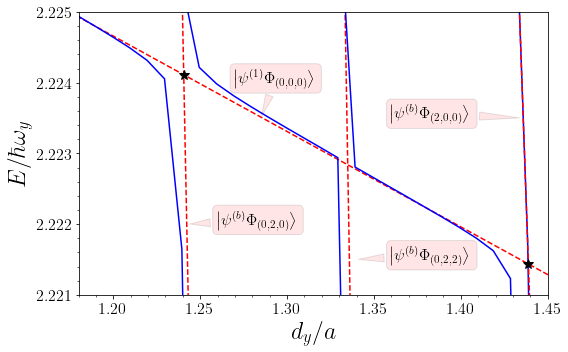

In [22]:
fig3, ax3 = plt.subplots(figsize=(8,5))
# nivel 1057:
f1057 = trap_fit(dic, x, x_lims=(1.18, 1.45), y_lims=(2.22, 2.225) ,levels=(1057, 1060), wy=wy, tol=10)/wy
ax3.plot(x, np.polyval(f1057, x), 'r--', markersize=4, label='Diabatic')
ax3.plot(x, dic['nivel_1057']/wy, 'b', label='Adiabatic')

# nivel 1058:
f1058 = np.polyfit(x[(x > 1.22) & (x < 1.24)], np.array(dic['nivel_1058'])[(x > 1.22) & (x < 1.24)]/wy, deg=1)
x1058 = np.linspace(1., 1.9, num=100)
ax3.plot(x1058, np.polyval(f1058, x1058), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1058']/wy, 'b')

# nivel 1059:
f1059 = np.polyfit(x[(x > 1.27) & (x < 1.34)], np.array(dic['nivel_1059'])[(x > 1.27) & (x < 1.34)]/wy, deg=1)
x1059 = np.linspace(1, 1.9, num=100)
ax3.plot(x1059, np.polyval(f1059, x1059), 'r--', markersize=4)
ax3.plot(x, dic['nivel_1059']/wy, 'b')

# nivel 1060:

ax3.plot(x, dic['nivel_1060']/wy, 'b')
f1060 = np.polyfit(x[(x > 1.42) & (x < 1.44)], np.array(dic['nivel_1060'])[(x > 1.42) & (x < 1.44)]/wy, deg=1)
x1060 = np.linspace(1.38, 1.45, num=100)
ax3.plot(x1060, np.polyval(f1060, x1060), 'r--', markersize=4)



# Crosses:
##########
ax3.plot(cross_points(f1057, f1058), np.polyval(f1057, cross_points(f1057, f1058)), 'k*', markersize=10)
ax3.plot(cross_points(f1057, f1060), np.polyval(f1057, cross_points(f1057, f1060)), 'k*', markersize=10)

# States:
#########
ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(1.243, 2.222), xytext=(1.26, 2.222), fontsize=ref_ticksize, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.285, 2.2235), xytext=(1.27, 2.224), fontsize=ref_ticksize, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,2)}\right>$', xy=(1.34, 2.2215), xytext=(1.36, 2.2215), fontsize=ref_ticksize, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(1.435, 2.2235), xytext=(1.36, 2.2235), fontsize=ref_ticksize, 
             bbox=dict(boxstyle="round", alpha=0.1, facecolor='r'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.1, facecolor='r'))

ax3.set_xlabel('$d_{y}/a$')
ax3.set_ylabel('$E/\hbar \omega_{y}$')
ax3.set_ylim(2.221, 2.225)
ax3.set_xlim(1.18, 1.45)
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
plt.tight_layout()
fig3.savefig('Results/Figures/Ix6604_Iy4993_Iz50_Easc_Interpolation.png', dpi=200)

In [32]:
print(f'''Crosses between (x, E):
* 1057-1058 (0,2,0): ({cross_points(f1057, f1058)}, {np.polyval(f1057, cross_points(f1057, f1058))})
* 1057-1060 (2,2,0): ({cross_points(f1057, f1060)}, {np.polyval(f1057, cross_points(f1057, f1060))})''')

Crosses between (x, E):
* 1057-1058 (0,2,0): (1.2405419824836112, 2.224111835699179)
* 1057-1060 (2,2,0): (1.4388880460298814, 2.221436411653955)


In [33]:
print(f'''ICIR: asc/dy:
* 1057-1058 (0,2,0): {1/cross_points(f1057, f1058)}
* 1057-1060 (2,0,0): {1/cross_points(f1057, f1060)}
''')

ICIR: asc/dy:
* 1057-1058 (0,2,0): 0.806099280894922
* 1057-1060 (2,0,0): 0.6949811020802886

